In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import operator

In [45]:
columns = ['Artist', 'Title', 'Album', '#_of_views', 'Release_date', '#_feat_artists', 'Artist_pop', 'Genre', 
           'Followers', 'Danceability', 'Energy', 'Valence', 'Duration', 'Loudness', '#_words', 'Lyrics']
music_df = pd.read_csv('lyricDataset.scv', names = columns)

In [46]:
genres = music_df['Genre']
g_list = list(genres)
genre_list = ['country', 'hip hop', 'pop', 'rock', 'punk', 'metal', 'australian'] #Australian reggae is outlier

In [47]:
correct_guesses = {}
for index, genre in enumerate(g_list):
    if type(genre) == float:
        continue
    else:
        if len(genre) == 1:
            print(genre)
            split_genres = genre
        else:
            split_genres = genre.split(' / ') 
    for g in genre_list:
        correct = 0
        if len(split_genres) == 1 and split_genres[0] == 'rap':
            correct_guesses['hip hop'] = correct
        else:
            for split in split_genres:
                if g in split:
                    correct += 1
            correct_guesses[g] = correct
    
    correct_genre = max(correct_guesses, key=lambda key: correct_guesses[key])
    if correct_genre == 'australian':
        g_list[index] = 'pop'
    elif correct_genre == 'punk':
        g_list[index] = 'rock'
    else:
        g_list[index] = correct_genre
    correct_guesses.clear()

In [48]:
music_df['corrected_genres'] = g_list
music_df.head()

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics,corrected_genres
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,contemporary country / country / country dawn ...,2184569,0.568,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...,country
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,74,contemporary country / country / country dawn ...,2184569,0.425,0.372,0.292,259280,-10.920,147,Hey there Mr. Tin Man\nYou don't know how luck...,country
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,74,contemporary country / country / country dawn ...,2184569,0.584,0.813,0.774,204387,-7.221,255,You only love me for my big sunglasses\nAnd my...,country
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,74,contemporary country / country / country dawn ...,2184569,0.768,0.809,0.748,177773,-4.204,315,I cut my bangs with some rusty kitchen scissor...,country
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,74,contemporary country / country / country dawn ...,2184569,0.777,0.245,0.349,109107,-14.266,307,Stand on the bar stomp your feet start clapp...,country


In [49]:
music_df['corrected_genres'].value_counts()

pop        500
hip hop    440
country    220
metal      220
rock       180
Name: corrected_genres, dtype: int64

In [50]:
# Do something where you analyse genres
genre_analyze = music_df.groupby(['corrected_genres'])

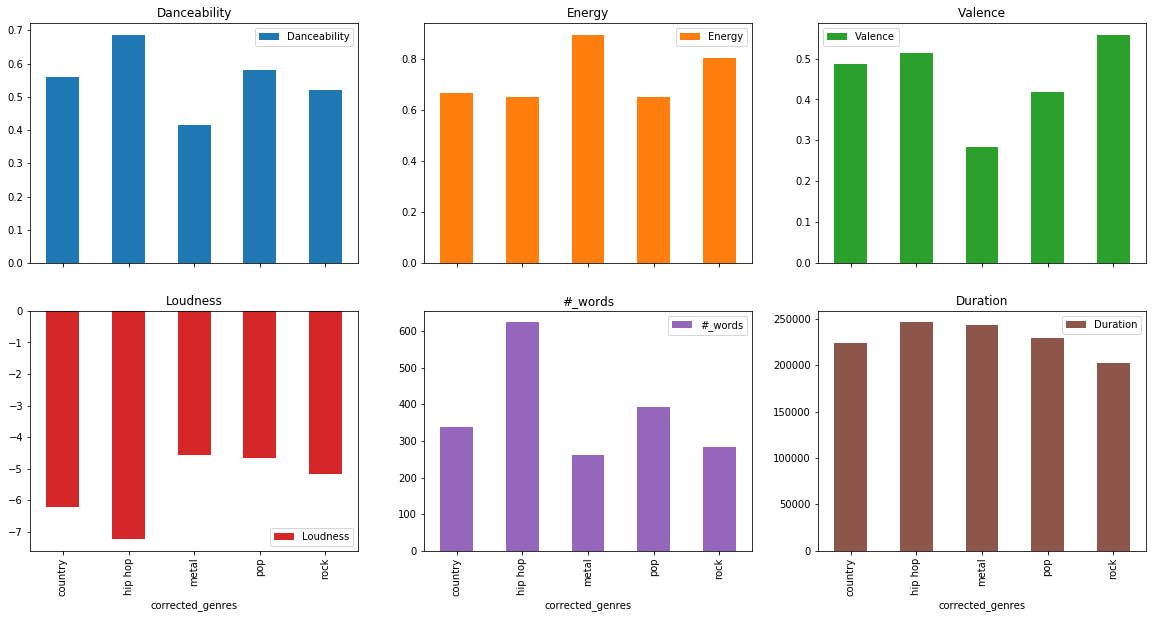

In [51]:
genre_analyze[['Danceability', 'Energy', 'Valence', 'Loudness', '#_words', 'Duration']].mean().plot.bar(subplots=True, layout=(3,3), figsize=(20,15))

In [52]:
# Plot some stuff over time. Also, use sentiment